对于这道测验，我们将使用三个模型来训练下面的圆形数据集。

决策树模型，
逻辑回归模型，以及
支持向量机模型。

![](./e004.png)

其中一个模型会过拟合，一个欠拟合，还有一个正常。首先，我们将编写代码为每个模型绘制学习曲线，最后我们将查看这些学习曲线，判断每个模型对应哪个曲线。

我们将使用函数 learning_curve：

train_sizes, train_scores, test_scores = learning_curve(
    estimator, X, y, cv=None, n_jobs=1, train_sizes=np.linspace(.1, 1.0, num_trainings))

不需要担心该函数的所有参数（[你可以在此处了解详情](https://scikit-learn.org/stable/auto_examples/model_selection/plot_learning_curve.html)），这里，我们将解释主要参数：

estimator，是我们针对数据使用的实际分类器，例如 LogisticRegression() 或 GradientBoostingClassifier()。

X 和 y 是我们的数据，分别表示特征和标签。

train_sizes 是用来在曲线上绘制每个点的数据大小。

train_scores 是针对每组数据进行训练后的算法训练得分。

test_scores 是针对每组数据进行训练后的算法测试得分。

## 两个重要的现象：

训练和测试得分是一个包含 3 个值的列表，这是因为函数使用了 3 折交叉验证。

非常重要：可以看出，我们使用训练和测试误差来定义我们的曲线，而这个函数使用训练和测试得分来定义曲线。二者是相反的，因此误差越高，得分就越低。因此，当你看到曲线时，你需要自己在脑中将它颠倒过来，以便与上面的曲线对比。

In [1]:
import matplotlib.pyplot as plt

%matplotlib inline

from sklearn.model_selection import learning_curve

# It is good to randomize the data before drawing Learning Curves
def randomize(X, Y):
    permutation = np.random.permutation(Y.shape[0])
    X2 = X[permutation,:]
    Y2 = Y[permutation]
    return X2, Y2

def draw_learning_curves(X, y, estimator, num_trainings,estimator_name):
    
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X2, y2, cv=None, n_jobs=1, train_sizes=np.linspace(.1, 1.0, num_trainings))

    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    plt.grid()

    plt.title("Learning Curves")
    plt.xlabel("Training examples_"+estimator_name)
    plt.ylabel("Score")

    plt.plot(train_scores_mean, 'o-', color="g",
             label="Training score")
    plt.plot(test_scores_mean, 'o-', color="y",
             label="Cross-validation score")


    plt.legend(loc="best")
    plt.savefig("./"+estimator_name+".png")
    plt.show()

In [2]:
# Import, read, and split data
import pandas as pd
data = pd.read_csv('data.csv')
import numpy as np


X = np.array(data[['x1', 'x2']])
y = np.array(data['y'])

# Fix random seed
np.random.seed(55)

### Imports
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC

# TODO: Uncomment one of the three classifiers, and hit "Test Run"
# to see the learning curve. Use these to answer the quiz below.

### Logistic Regression
#estimator = LogisticRegression()
#estimator_name = "LogisticRegression"

### Decision Tree
#estimator = GradientBoostingClassifier()
#estimator_name = "GradientBoostingClassifier"

### Support Vector Machine
estimator = SVC(kernel='rbf', gamma=1000)
estimator_name = "SVC"



100 10.0


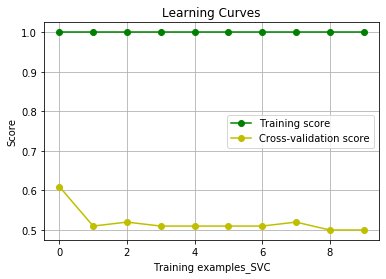

In [3]:
num_trainings = len(y)/10
print(len(y),num_trainings)
X2, y2 = randomize(X, y)

draw_learning_curves( X, y,estimator,num_trainings,estimator_name)

![](./LogisticRegression.png)
![](./GradientBoostingClassifier.png)
![](./SVC.png)

获得曲线：

![](./e200.png)

我们可以根据这些曲线得出结论：

**对数几率回归模型**的训练和测试得分很低。

**决策树模型**的训练和测试得分很高。

**支持向量机模型**的训练得分很高，测试得分很低。

由此可以判断，逻辑回归模型欠拟合，支持向量机模型过拟合，决策树正常。

同样，我们可以翻转这些曲线（因为它们测量的是得分，而原始曲线测量的是错误），并将它们与下面的三条曲线对比，可以看出它们与我们之前看到的三条曲线很像。（注意：我们需要翻转曲线并不意味着错误是 1 减去得分。只是表示模型越来越好的话，错误会降低，得分会升高。）

![](./e201.png)

现在我们应该检测在实际模型中是否这样。当我们绘制每个模型的界限曲线时，结果如下所示：

![](./e202.png)

当我们查看上述模型时，第一个模型欠拟合，第二个正常，第三个过拟合，这种现象合理吗？合理吧？我们看到数据由圆圈或方框正确地划分出来。我们的模型按以下形式划分数据：

**逻辑回归**模型使用一条直线，这太简单了。在训练集上的效果不太好，因此欠拟合。

**决策树**模型使用一个方形，拟合的很好，并能够泛化。因此，该模型效果很好。

**支持向量**机模型实际上在每个点周围都画了一个小圆圈。它实际上是在记住训练集，无法泛化。因此 过拟合。

最好尽可能进行实际检查，确保模型的确具有指标所指示的行为。